### Testing the ```utils.Filehandling.FileHandlingInterface``` module

In [2]:
from src.lib.utils.FileHandling.FileHandlingInterface import *
from src.lib.probabilityEstim.Likelihood import *
import matplotlib.pyplot as plt
import logging
import time
import warnings

In [3]:
numba_logger = logging.getLogger('numba')
numba_logger.setLevel(logging.DEBUG)
warnings.simplefilter("always", RuntimeWarning)

In [4]:
PASCAL_DEMO_IMAGE_PATH = r"src\data\demoPascal\2008_003147.jpg"
PASCAL_DEMO_IMAGE_PATH1 = r"src\data\demoPascal\2010_005258.jpg"

In [60]:
sample_image = TargetImage(
    PASCAL_DEMO_IMAGE_PATH1              
)

In [65]:
image_array = sample_image.get_image_array()

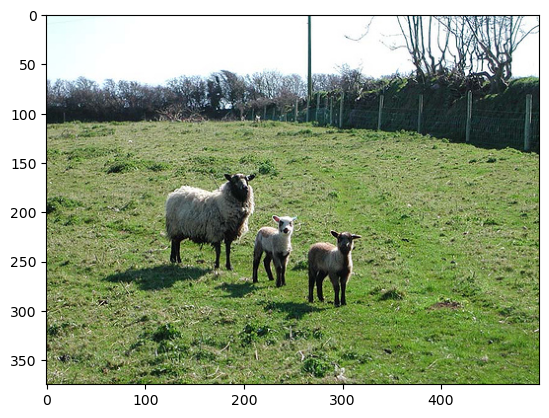

In [7]:
plt.imshow(image_array.transpose((2, 1, 0)))

In [8]:
PASCAL_DEMO_SCRIBBLE_PATH = r"src\data\demoPascal\2008_003147.xml"
PASCAL_DEMO_SCRIBBLE_PATH1 = r"src\data\demoPascal\2010_005258.xml"

In [59]:
sample_scribble = EncodedScribble(
    PASCAL_DEMO_SCRIBBLE_PATH1
)

debug values: 

*    0 -> No debugging (Default)
*    1 -> Spatial Kernel
*    2 -> Chromatic Kernel
*    3 -> Spatial Kernel Exponent Argument
*    4 -> Chromatic Kernel Exponent Argument
*    5 -> Spatial Kernel Normalization Term 
*    7 -> Spatial Kernel Width

In [61]:
n_classes = sample_scribble.get_n_classes()

In [71]:
likelihood = Likelihood(
    n_classes, 
    on_gpu = True, 
    debug = 5,
    #alpha = 13, 
    #sigma = 18
)

In [74]:
time0 = time.time()
fitted_likelihood = likelihood.fit(
    sample_image, 
    sample_scribble,
    #normalize = True
)
print(f"{time.time() - time0}")

2.0365588665008545


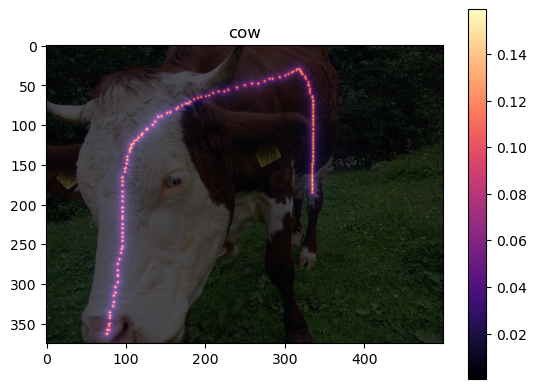

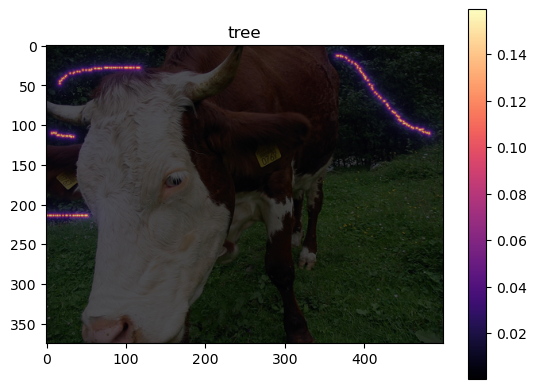

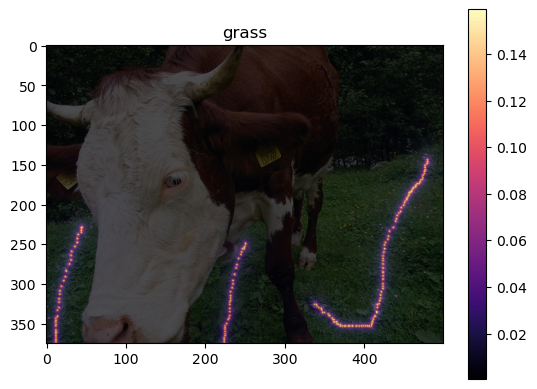

In [75]:
classes = list(sample_scribble.get_scribble_dictionary().keys())
for dim in range(fitted_likelihood.shape[0]):
    # Create a new figure and axis for each plot
    fig, ax = plt.subplots()
    
    vmin = np.min(fitted_likelihood[dim])
    vmax = np.max(fitted_likelihood[dim])
    im1 = ax.imshow(fitted_likelihood[dim].transpose((1, 0)), cmap='magma', alpha=1.0, vmin=vmin, vmax=vmax)
    
    # Add a title and colorbar legend to the plot
    ax.set_title(classes[dim]) 
    fig.colorbar(im1, ax=ax, label='')
    
    # Plot the image array on the same axis
    im2 = ax.imshow(image_array.transpose((2, 1, 0)), alpha=0.3)
    
    
    # Save the plot as a PNG image file
    #fig.savefig(f'plots/2010/notNormalized10/plot_{classes[dim]}.png', dpi=300)
    # Show the plot
    plt.show()


In [32]:
np.max(fitted_likelihood)

1.0